In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer-Churn-Prediction - Customer-Churn-Prediction.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, train_size=.75, random_state=42)

In [6]:
train.shape

(5282, 21)

In [7]:
test.shape

(1761, 21)

In [8]:
df1 = df.copy()

In [9]:
df2 = df.copy()

In [10]:
df3 = df.copy()

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7043, 21)

# Findin Null Value using null method

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.isnull().mean() # to check the percentage of of null values

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [15]:
# to find out which line has null value

null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

      customerID  gender  SeniorCitizen Partner Dependents  tenure   
488   4472-LVYGI  Female              0     Yes        Yes       0  \
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...   
488            No  No phone service             DSL                  Yes  ... 

# Handling missing value

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
mean_TotalCharges = df.TotalCharges.mean()
median_TotalCharges = df.TotalCharges.median()

In [18]:
mean_TotalCharges

2283.3004408418656

In [19]:
median_TotalCharges

1397.475

In [20]:
df['TotalCharges_mean'] = df['TotalCharges'].fillna(mean_TotalCharges)
df['TotalCharges_median'] = df['TotalCharges'].fillna(median_TotalCharges)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_mean,TotalCharges_median
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,151.65


In [22]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_mean,TotalCharges_median
3912,3882-IYOIJ,Female,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),115.25,6758.45,No,6758.45,6758.45
4688,2988-GBIVW,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,No,Yes,Month-to-month,Yes,Electronic check,90.85,6470.10,No,6470.10,6470.10
3486,2558-BUOZZ,Male,0,No,No,47,Yes,Yes,Fiber optic,Yes,...,Yes,No,One year,No,Bank transfer (automatic),94.80,4535.85,No,4535.85,4535.85
592,0459-SPZHJ,Male,0,Yes,Yes,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),83.50,5435.00,No,5435.00,5435.00
6803,5681-LLOEI,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,Yes,...,No,No,One year,Yes,Credit card (automatic),91.25,4013.80,No,4013.80,4013.80
6334,4129-LYCOI,Female,0,No,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Electronic check,104.00,7039.05,No,7039.05,7039.05
5062,2911-UREFD,Female,0,Yes,No,39,No,No phone service,DSL,Yes,...,Yes,Yes,Month-to-month,No,Electronic check,55.90,2184.35,Yes,2184.35,2184.35
2574,3269-ATYWD,Male,1,No,No,39,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.65,3759.05,Yes,3759.05,3759.05
5143,5204-HMGYF,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,87.20,4345.00,No,4345.00,4345.00
5436,7246-ZGQDF,Female,0,No,Yes,1,Yes,No,DSL,Yes,...,No,No,Month-to-month,No,Electronic check,54.50,54.50,No,54.50,54.50


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_mean,TotalCharges_median
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1889.50,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65,151.65


# Variance check

In [24]:
# To handle missing value we have to do 3 or more test 

In [25]:
print("Orginal TotalCharges variable variance:", df['TotalCharges'].var())
print("Mean TotalCharges variable variance:", df['TotalCharges_mean'].var())
print("Median TotalCharges variable variance:", df['TotalCharges_median'].var())

Orginal TotalCharges variable variance: 5138252.407053568
Mean TotalCharges variable variance: 5130226.167849139
Median TotalCharges variable variance: 5131449.978239651


# Distribution 

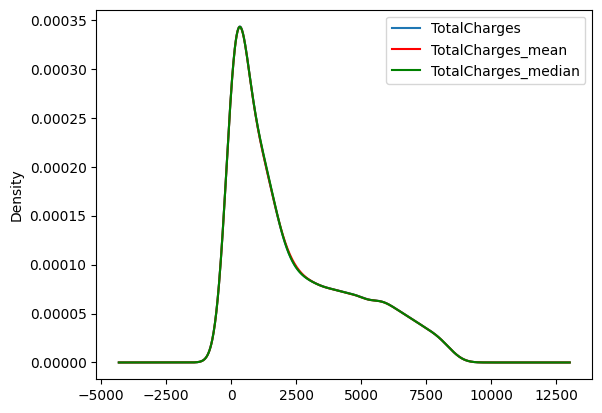

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['TotalCharges'].plot(kind='kde', ax=ax)
df['TotalCharges_mean'].plot(kind='kde', ax=ax, color='red')
df['TotalCharges_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [27]:
columns_to_drop = ['TotalCharges_mean', 'TotalCharges_median']
df.drop(columns_to_drop, axis=1, inplace=True)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# filling null values using mean method

In [30]:
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.mean())

In [31]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
df['Churn'].value_counts() 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [33]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

print(f'Not churned {not_churned} percent of total people')
print(f'Churned {churned} percent of total people')

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


<Axes: xlabel='Churn', ylabel='count'>

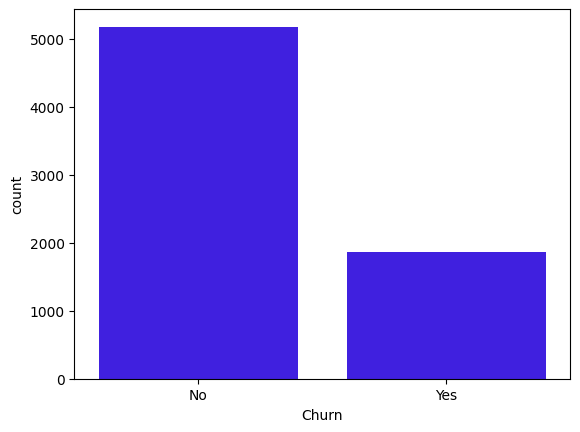

In [34]:
sns.countplot(x = df['Churn'], color = '#2B00FF') # y = means horizontal and x = vertical

# Data Visualization using Seaborn 

<Axes: xlabel='gender', ylabel='count'>

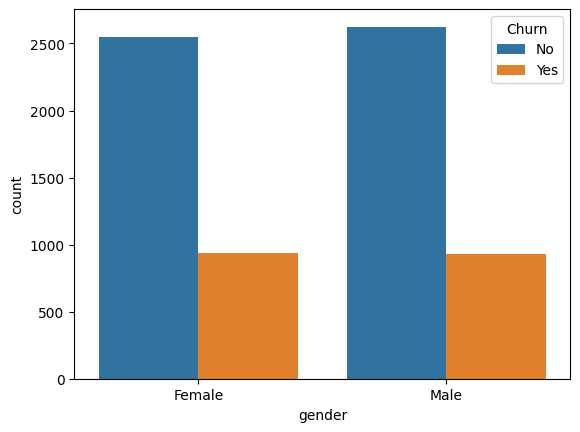

In [35]:
sns.countplot(x = 'gender', hue = 'Churn', data = df)

<Axes: xlabel='InternetService', ylabel='count'>

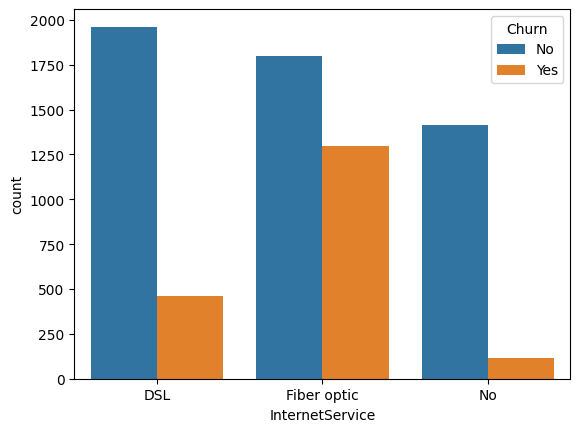

In [36]:
sns.countplot(x = 'InternetService', hue = 'Churn', data = df) # no means = Not churned and yes means = Churned

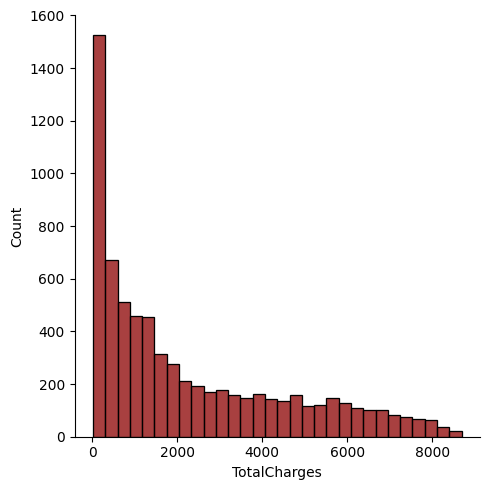

In [37]:
sns.displot(df['TotalCharges'].dropna(), kde = False, color='darkred', bins=30)

<Axes: xlabel='InternetService', ylabel='TotalCharges'>

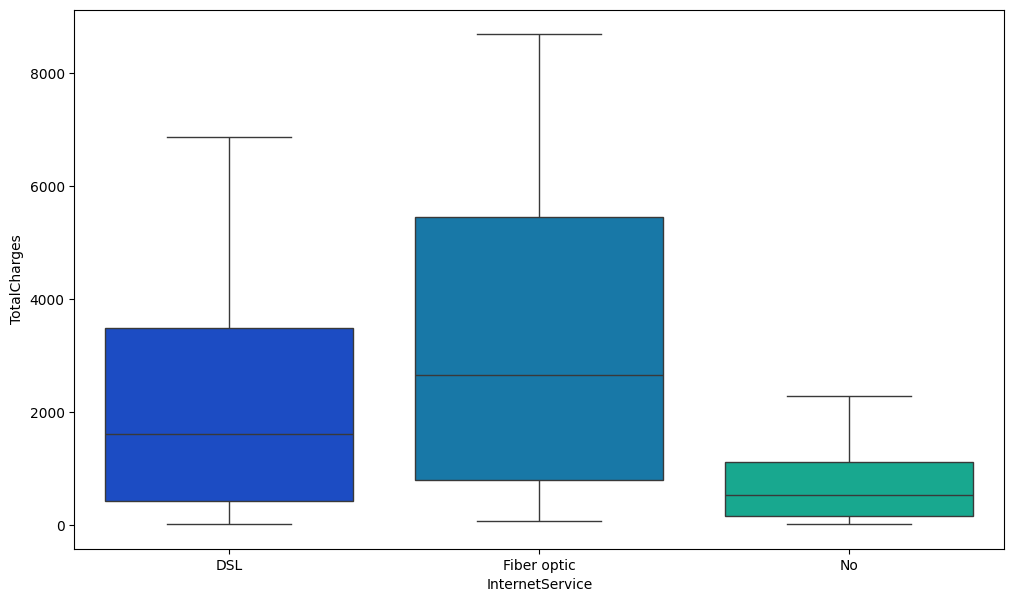

In [38]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'InternetService', y = 'TotalCharges', data = df, palette = 'winter')

In [39]:
df.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

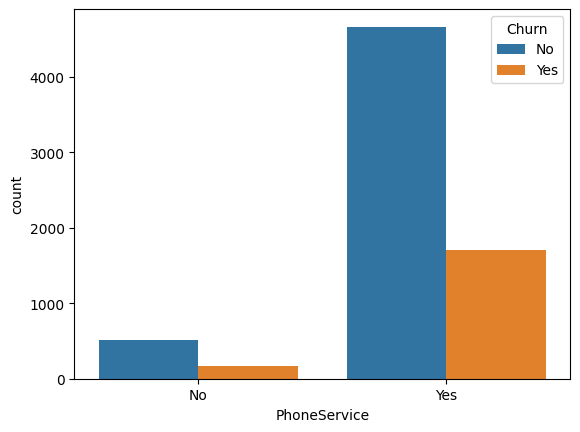

In [40]:
sns.countplot(x = 'PhoneService', hue = 'Churn', data = df)

<Axes: xlabel='PhoneService', ylabel='TotalCharges'>

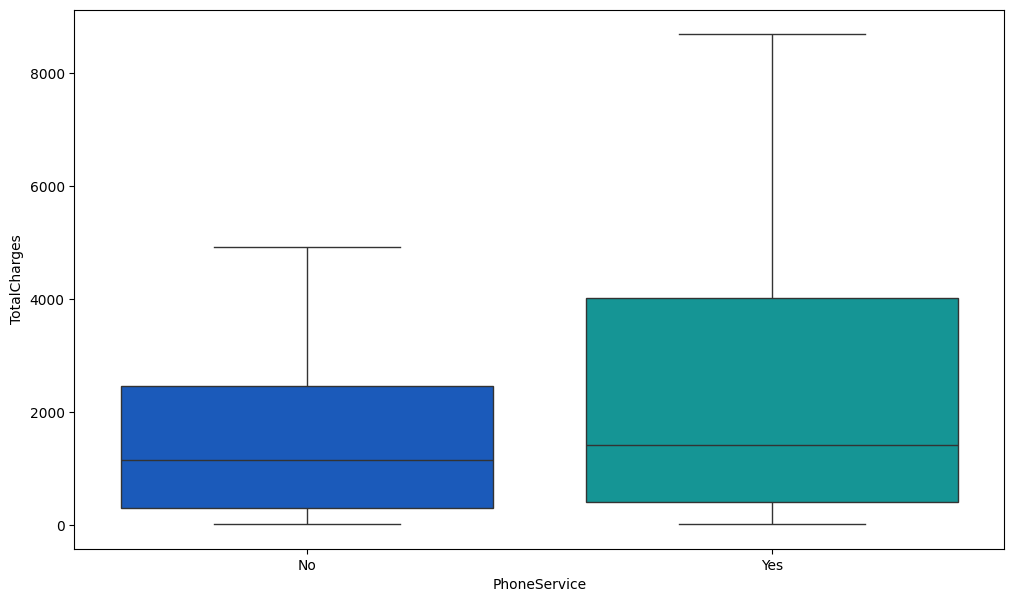

In [41]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'PhoneService', y = 'TotalCharges', data = df, palette = 'winter')

<Axes: xlabel='OnlineSecurity', ylabel='count'>

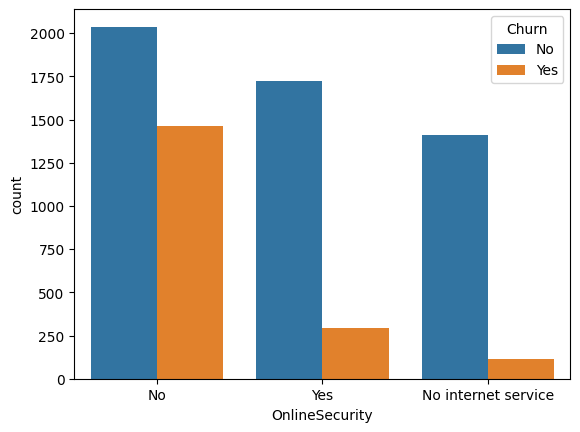

In [42]:
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df)

<Axes: xlabel='PhoneService', ylabel='TotalCharges'>

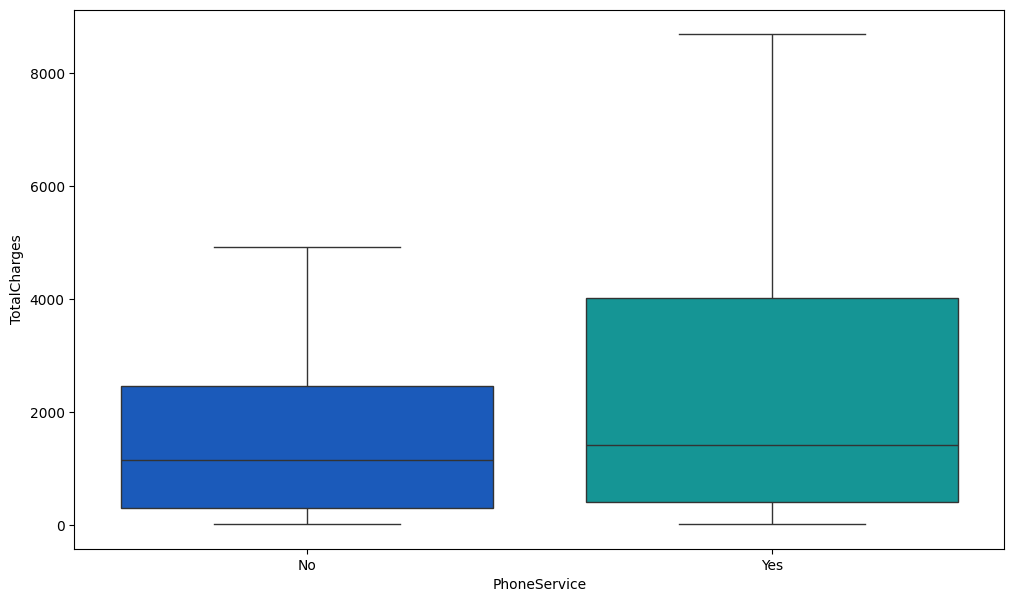

In [43]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'PhoneService', y = 'TotalCharges', data = df, palette = 'winter')

In [44]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='count'>

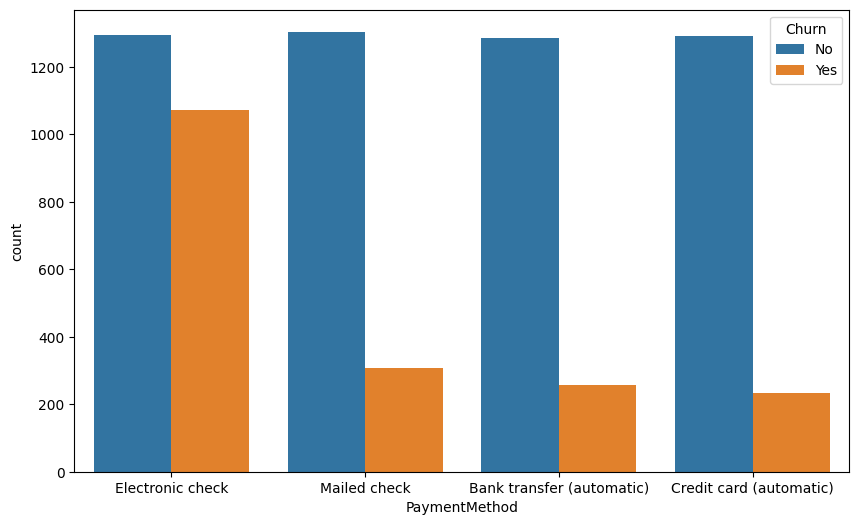

In [45]:
plt.subplots(figsize=(10, 6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)

In [46]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [47]:
df.drop('customerID', axis = 1, inplace = True)

In [48]:
df.shape

(7043, 20)

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encoding the dataset

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label = LabelEncoder()

In [52]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [53]:
from pandas.core.dtypes.common import is_numeric_dtype

In [54]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [55]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [60]:
#df.cov()

In [61]:
#df.corr()

In [59]:
#df[['TotalCharges', 'TotalCharges_mean', 'TotalCharges_median']].boxplot()

# Separate X, Y

In [62]:
x = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [63]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [64]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# Imbalanced Data handling

In [65]:
not_churned

73.4630129206304

In [66]:
churned

26.536987079369588

In [67]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

# Synthetic Minority Oversampling Technique(SMOTETomek)

In [68]:
#! pip install imblearn

In [76]:
from imblearn.combine import SMOTETomek

In [77]:
sm = SMOTETomek(random_state=100)

In [78]:
y.value_counts()

Churn
0        5174
1        1869
Name: count, dtype: int64

In [79]:
X, Y = sm.fit_resample(x, y)

In [80]:
X.shape

(9610, 19)

In [81]:
Y.shape

(9610, 1)

# Near Miss for Under_Sampling

In [82]:
from imblearn.under_sampling import NearMiss

In [83]:
nm = NearMiss()
new_x, new_y = nm.fit_resample(x, y)

In [84]:
new_x.shape

(3738, 19)

In [85]:
new_y.shape

(3738, 1)

In [86]:
new_y.value_counts()

Churn
0        1869
1        1869
Name: count, dtype: int64

# Over Sampling

In [87]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df2.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import RandomOverSampler

In [90]:
os = RandomOverSampler(random_state=100)

In [91]:
x_new, y_new = os.fit_resample(x, y)

In [92]:
x_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [93]:
x_new.shape

(10348, 19)

In [94]:
y_new.shape

(10348, 1)

In [95]:
y_new.value_counts()

Churn
0        5174
1        5174
Name: count, dtype: int64

# Cross Validation

# Hold Out Cross Validation

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75, random_state=42) # work on oversampling

In [98]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3520,0,0,1,0,16,1,0,2,1,1,1,1,1,1,0,0,3,19.60,314.45
5262,0,0,0,0,59,1,2,0,2,0,0,2,0,2,1,0,0,68.70,4070.95
10333,1,0,0,0,32,1,0,1,0,0,0,2,2,2,0,1,2,96.20,3183.40
4058,0,0,1,1,40,1,2,1,0,0,2,2,0,0,0,1,2,84.85,3303.05
7089,1,0,0,0,24,1,0,1,0,0,0,2,2,2,0,1,2,96.00,2122.45


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
clf = DecisionTreeClassifier()

In [101]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [106]:
clf.predict(xtest)

array([1, 0, 0, ..., 0, 0, 0])

In [110]:
clf.score(xtest, ytest) # after balacing dataset

0.8620023192887515

In [115]:
xtrain.shape

(7761, 19)

# Without Sampling

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.75, random_state=42)

In [112]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [113]:
clf.predict(x_test)

array([1, 1, 0, ..., 0, 0, 0])

In [114]:
clf.score(x_test, y_test) # imbalanced old data 

0.7221275790270679

In [116]:
x_train.shape

(1760, 19)

# XBoost classifier

In [118]:
#!pip install xgboost

In [125]:
import xgboost
from xgboost import XGBClassifier

In [126]:
xgb = XGBClassifier()

In [127]:
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
xgb.predict(xtest)

array([1, 0, 0, ..., 0, 0, 0])

In [128]:
xgb.score(xtest, ytest) # after sempling

0.8542713567839196

# Befor sampling

In [129]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
xgb.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

In [131]:
xgb.score(x_test, y_test)

0.7741813363619156

# Ada Boost

In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
ada = AdaBoostClassifier()

In [134]:
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [135]:
ada.score(x_test, y_test)

0.7942456937346205

# Cross Validation

# K fold cross validation

In [136]:
from sklearn.model_selection import KFold, cross_val_score

In [137]:
kfold = KFold(n_splits=5, shuffle=True) # each fold contain 20% data

In [138]:
result = cross_val_score(xgb, x_new, y_new, cv = kfold)

In [139]:
result

array([0.8468599 , 0.84444444, 0.86570048, 0.85790237, 0.85210246])

In [140]:
result.mean()

0.8534019328341307

In [142]:
result.max()

0.8657004830917875

In [143]:
result.min()

0.8444444444444444

# Stratified k fold cross validation

In [144]:
from sklearn.model_selection import StratifiedKFold

In [145]:
sfold = StratifiedKFold(n_splits=5)

In [147]:
scores = cross_val_score(xgb, x_new, y_new, cv = sfold)

In [149]:
scores

array([0.84637681, 0.85410628, 0.86038647, 0.87288545, 0.88110198])

In [150]:
scores.mean()

0.862971399752033

In [151]:
scores.max()

0.8811019816336394

In [152]:
scores.min()

0.8463768115942029